# YOUR PROJECT TITLE

#dai valori a ci e poi setti sigma maggiore di uno e gamma minore di zero così sei sicura che funzione elasticità sia decrescente. poi sostituisci a pi la funzione di elasticità, a pi trovato facendo le sostituzioni?

#se no prova a fare anche con optimize e interpolation come avete scritto al prof e vedete se vengono due risultati uguali??

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [40]:
import numpy as np
from scipy import optimize
import sympy as sm
from sympy import Function
from types import SimpleNamespace
from scipy import interpolate
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from krugmanclass import KrugmanModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

[The following specification of the Krugman model is based on the exam of International Economics of June 2022]

The Krugman model is an international trade model developed in 1979. The previous trade models were based on comparative advantage or difference in factor endowments between countries. But those models could not give explanations to some empirical facts, like intense trade between countries aligned in term of technologies and endowments. 
Krugman model takes this issue into account, including in the assumptions also the Increasing Return to scale (IRS).

The model is based on the monopolistic competiton model of Dixit and Stiglitz (1977). 

**ASSUMPTIONS

Supply side: 
* N firms, with N large 
* each firm produce a differentiate product *i* whose price is $p_i$ with a similar technology
* absence of barriers to entry and exit
* IRS, modelled with a fixed cost (labour)
* no trade costs 

Demand side:
* consumers prefer differentiation of products
* there are L consumers that are also workers

Since firms produce differentiated products, they can act as monopolists of their variety, setting prices freely, and gaining positive profits. This surplus attracts other firms in the economy, facilitated by the absence of barriers to entry. This process leads to the transition from monopoly to perfect competition, characterised by null profits and no incentives to other firms to entry.

**PROCEDURE TO SOLVE THE MODEL** 
1. Analyze the consumer maximization problem to find the elasticity of demand
2. Analyze the firm maximization problem to derive the optimal pricing strategy for the firm in monopoly (which will be the curve PP)
3. Impose the zero profit condition in the long run due to the entry of many firms, that will result in the ZZ curve
4. Find optimal markup and consumption at the equilibrium between the curves
5. Find the number of firms at the equilibrium 


**EQUILIBRIUM EQUATIONS**
* Firm maximize profits in monopoly: MR (marginal revenue) = MC (marginal cost)
* zero profit in the long run: P (price) = AC (average cost)
* labour market clearing condition: $L = \sum_{i=1}^N L_i  $
* goods market clearing condition: $y_i = L c_i$

Note: The equilibrium is symmetric, so at the equilibrium all firms charge the same price $p_i = p$ and produce the same output $y_i = y$. 

**CONSUMERS**

$$U = \sum_{i=1}^N \left(\gamma c_i + c_i ^{\frac{\sigma - 1}{\sigma}}\right)$$

**MAXIMIZATION OF REPRESENTATIVE CONSUMER'S UTILITY FUNCTION**

The maximization of the representative consumer's utility function requires that total expenditure is equal to total income.

To solve the consumer problem, we set the Lagrangian

$$\max_{c_i}\sum_{i=1}^N \left(\gamma c_i + c_i^\frac{\sigma-1}{\sigma}\right) - \lambda \sum_{i=1}^N (c_i p_i - w)$$

Deriving this function with respect to the consumption for each consumer, we obtain the following first order conditions (FOCs):

$$\gamma + \frac{\sigma-1}{\sigma} c_i^{-\frac{1}{\sigma}} = \lambda p_i \quad \forall i = 1,\dots,N$$


It is important to notice how $c_{i}$ is function of $p_{i}$.

We then solve for $\frac{dc_i}{dp_i}\frac{p}{c_i}$

and we obtain: 

$$\frac{\partial c_i}{\partial p_i} \frac{p_i}{c_i} = -\sigma \frac{\gamma c_i^\frac{1}{\sigma} + \frac{\sigma-1}{\sigma}}{\frac{\sigma-1}{\sigma}}$$

It is possible to define the price elasticity of demand $\epsilon(c_{i}) \equiv -\frac{\partial c_i}{\partial p_i} \frac{p_i}{c_i} = \sigma \frac{\gamma c_i^\frac{1}{\sigma} + \frac{\sigma-1}{\sigma}}{\frac{\sigma-1}{\sigma}}$


**PRODUCERS**
Production technology: input used is only labour, with a fixed cost: $L_i = \alpha + \beta y_i$. 

MAXIMIZATION OF FIRM'S PROFIT FUNCTION

The i-th firm's profit function is given by:
$$\pi_i = p_i y_i - L_i w$$

Each firm maximize its profit with respect to the price charged:

$$\max_{p_i} p_i y_i - (\alpha + \beta y_i)w$$

Since $y_i=L_i c_i (p_i)$ is the demand curve that the firm faces, it is possible to obtain an unconstrained mazimization problem:

$$\max_{p_i} p_i y_i - (\alpha + \beta L_i c_i(p_i))w$$

which has the following FOCs:

$$\frac{\partial \pi_i}{\partial p_i} = 0$$

$$L c_i(p_i) + p_i L \frac{\partial c_i(p_i)}{\partial p_i} - \beta w L \frac{\partial c_i(p_i)}{\partial p_i} = 0$$

$$c_i(p_i) + p_i \frac{\partial c_i(p_i)}{\partial p_i} - \beta w \frac{\partial c_i(p_i)}{\partial p_i} = 0$$

$$1 + \frac{1}{c_i(p_i)} \frac{\partial c_i(p_i)}{\partial p_i} (p_i - \beta w) = 0$$

$$ \frac{p_i}{c_i(p_i)} \frac{\partial c_i(p_i)}{\partial p_i} \left(1 - \frac{\beta w}{p_i}\right) = -1 $$

Since $\frac{p_i}{c_i(p_i)} \frac{\partial c_i(p_i)}{\partial p_i} = -\epsilon(c_{i})$:

$$\epsilon(c_{i}) \beta w = (-1 + \epsilon(c_{i}))p_i$$

$$p_i = \frac{\epsilon(c_{i})}{\epsilon(c_{i})-1} \beta w$$

where $\frac{\epsilon(c_{i})}{\epsilon(c_{i})-1}$ is the markup and $\beta w$ is the MC.

This is the optimal price strategy for the i-th firm.

As previously stated, the lack of barriers to entry and positive profits attract more and more enterprises into the market, and this leads to a state of perfect competition, with null profits for all the firms involved.

$$\pi_i =0$$
$$p_i y_i - w (\alpha + \beta y_i) = 0$$
$$ p_i = w \left(\frac{\alpha}{y_i} + \beta\right) $$

questo avevamo detto di no ma magari può servire, intanto l'ho solo copiato e incollato qui

In a symmetric equilibrium, we must have:
1. All active firms produce the same, $y_i = y$.
2. All prices are identical, $p_i = p$.
3. All goods are demanded in the same quantity, $c_i = c$.
4. Output markets clear, such that production of a product equals total demand for that same product, $y_i = c_i L$.
5. Labor markets clear, $\sum_{i=1}^N (L_i)=L$.
6. All active firms set prices according to the optimal pricing rule.
7. No firms earn positive profits.

Given the seven points above, we can write the pricing condition and the zero profit condition as:
$$MR=MC : \frac{p}{w}=\frac{\epsilon(c)}{\epsilon(c)-1} \beta$$
$$p=AC: \frac{p}{w}=\frac{\alpha}{cL} +\beta$$
In the $\left(c,\frac{p}{w}\right)$ space, the first is upward-sloping and the second is downward-sloping. The equilibrium is determined by their intersection.
Note that the assumption of $\gamma<0$ is necessary to obtain the upward sloping, and therefore the equilibrium unique an "stable".

We now obtain the number of firms active in equilibrium as:
$$\underbrace{L=\sum_{i=1}^N(L_i)}_{\substack{\text{Labour market}\\\text{clearing}}}=\sum_{i=1}^N(\alpha+\beta y_i)=N(\alpha+\beta c L)$$

$$N=\frac{L}{\alpha+\beta c L}$$

Is is important to notice that for a given size of the labor force $L$, higher demand for a given product ($c \uparrow$) allows for fewer firms (and therefore profucts) active in equilibrium ($N \downarrow$).




In [41]:
model = KrugmanModelClass()

In [42]:
# prepare price grid 
p_grid = np.linspace(model.par.p_min,model.par.p_max,model.par.Np)

# obtain consumption function given the price grid 
consumption_function = np.empty(model.par.Np) 
for i,p in enumerate(p_grid):
    model.par.p = p 
    consumption_function[i] = model.solve_consumer()


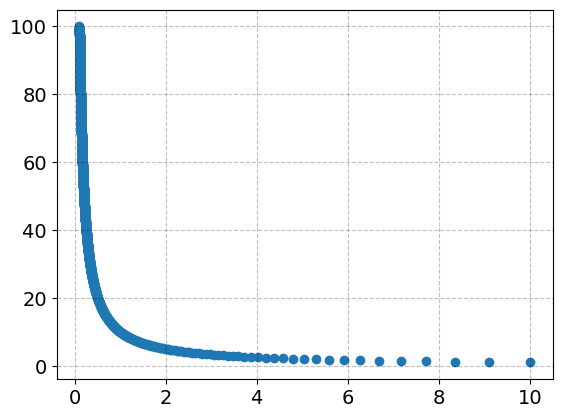

In [43]:
fig = plt.figure()
axx = fig.add_subplot(1,1,1)
axx.scatter(consumption_function, p_grid)

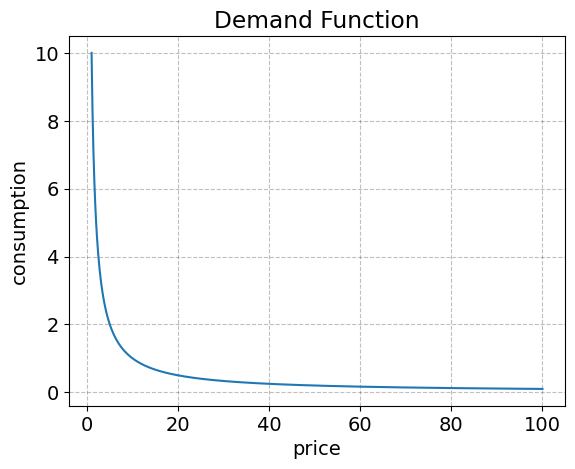

In [44]:
# Interpolate values to create Demand Function
interp_func = interpolate.RegularGridInterpolator([p_grid], consumption_function,
                                                  bounds_error=False,
                                                  fill_value=None)

# Interpolate values to create Price Function
interp_func_p = interpolate.RegularGridInterpolator([consumption_function], p_grid,
                                                  bounds_error=False,
                                                  fill_value=None)

# Plot Demand Function
fig = plt.figure()
axx = fig.add_subplot(1,1,1)
axx.plot(p_grid, interp_func)
axx.set_title('Demand Function')
axx.set_xlabel('price')
axx.set_ylabel('consumption');

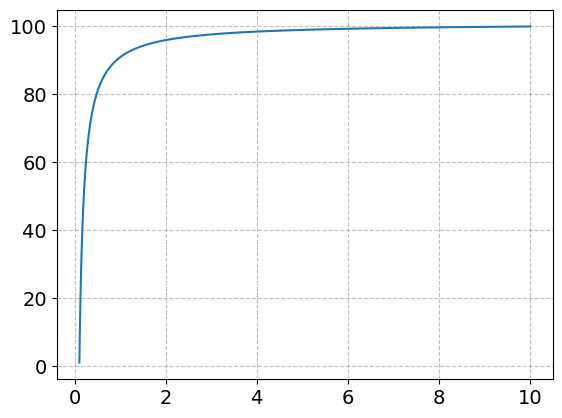

In [59]:
fig = plt.figure()
axx = fig.add_subplot(1,1,1)
axx.plot(consumption_function, interp_func_p)

In [46]:
def elasticity2(c,p_interp= interp_func_p,eps = 1e-4):
    p = interp_func_p([c])
    c_eps = c+eps
    p_eps = interp_func_p([c_eps])
    return  -((c-c_eps)/(p-p_eps) * p/c)
    

In [47]:
def ppc(c,par):
    return (elasticity2(c)*par.beta*par.w)/(elasticity2(c)-1)

In [48]:
tr5 = np.array([ elasticity2(c) for c in consumption_function ])
tr5

array([[0.90983654],
       [1.09909973],
       [1.09016327],
       [1.08270617],
       [1.07638953],
       [1.07096832],
       [1.06626446],
       [1.06214744],
       [1.05851006],
       [1.05527586],
       [1.0523815 ],
       [1.04977376],
       [1.04741379],
       [1.04526749],
       [1.04330709],
       [1.04150943],
       [1.03985507],
       [1.03832753],
       [1.03691275],
       [1.0355987 ],
       [1.034375  ],
       [1.03323263],
       [1.03216374],
       [1.03116147],
       [1.03021978],
       [1.02933308],
       [1.02849743],
       [1.02770803],
       [1.02696078],
       [1.02625298],
       [1.02558139],
       [1.02494341],
       [1.02433617],
       [1.02375815],
       [1.02320669],
       [1.0226804 ],
       [1.02217741],
       [1.02169619],
       [1.02123573],
       [1.02079366],
       [1.02037047],
       [1.01996386],
       [1.01957317],
       [1.01919654],
       [1.01883638],
       [1.01848714],
       [1.01815216],
       [1.017

In [49]:
tr6 = np.array([ppc(c,model.par) for c in consumption_function])
tr6

array([[ -50.45483578],
       [  55.45422637],
       [  60.45495552],
       [  65.45497824],
       [  70.45399534],
       [  75.45397417],
       [  80.45523374],
       [  85.4538338 ],
       [  90.45538546],
       [  95.45539539],
       [ 100.45354631],
       [ 105.45454337],
       [ 110.45454396],
       [ 115.45454465],
       [ 120.45454548],
       [ 125.45454647],
       [ 130.45454764],
       [ 135.45454902],
       [ 140.45455059],
       [ 145.45455239],
       [ 150.45455443],
       [ 155.45455671],
       [ 160.45455929],
       [ 165.45456215],
       [ 170.45456535],
       [ 175.45599122],
       [ 180.45439671],
       [ 185.45308591],
       [ 190.45458165],
       [ 195.45458672],
       [ 200.45459225],
       [ 205.45375153],
       [ 210.45551536],
       [ 215.45413047],
       [ 220.45513519],
       [ 225.45463726],
       [ 230.45462571],
       [ 235.45522581],
       [ 240.45219001],
       [ 245.45793392],
       [ 250.45329428],
       [ 255.452

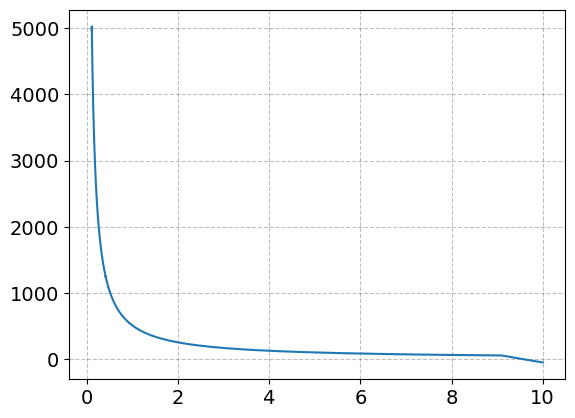

In [50]:
fig = plt.figure()
axx = fig.add_subplot(1,1,1)
axx.plot(consumption_function, tr6)

In [51]:
tr2 = model.pp(consumption_function)

In [52]:
price2 = np.empty(model.par.Np) 
for i,c in enumerate(consumption_function):
   model.par.c = c
   price2[i] = model.solve_firm2()


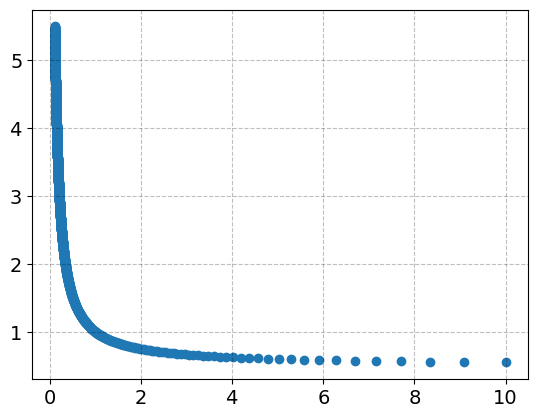

In [53]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(consumption_function, price2/model.par.w)

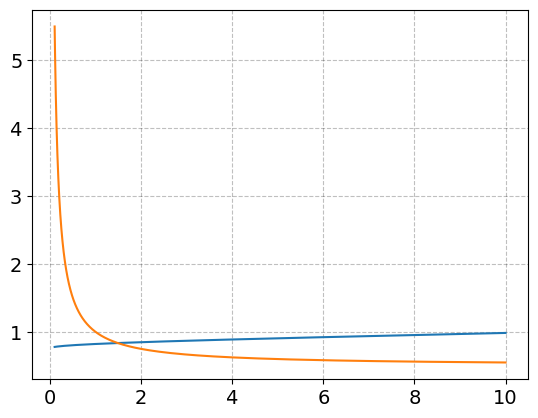

In [54]:
interp_func1 = interpolate.RegularGridInterpolator([consumption_function], tr2/model.par.w,
                                                  bounds_error=False,
                                                  fill_value=None)

interp_func2 = interpolate.RegularGridInterpolator([consumption_function], price2/model.par.w,
                                                  bounds_error=False,
                                                  fill_value=None)
fig = plt.figure()
axx = fig.add_subplot(1,1,1)
axx.plot(consumption_function, tr2/model.par.w)
axx.plot(consumption_function, price2/model.par.w)

In [55]:
# Obtain the difference between the two curves 
def eq(x):
   return interp_func1([x])-interp_func2([x])

# Find root of the difference i.e. equilibrium consumption
res = optimize.root_scalar(eq,bracket=[0.5,5])
print(res.root)

1.48648458167151


In [56]:
# Find p/w at the equilibrium
interp_func1([res.root])

array([0.83637603])

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

In [57]:
# Define all symbols
pi = sm.symbols('p_i')
yi = sm.symbols('y_i') 
Li = sm.symbols('L_i')
w = sm.symbols('w')
alpha = sm.symbols('alpha')
beta = sm.symbols('beta')
ci = sm.symbols('c_i')
L = sm.symbols('L')
cipi = Function('c')(pi)
eci = sm.symbols('epsilon (c_i)')

# Define profit function 
profit = pi*yi - Li*w 

# Define cost of labor
labour = alpha + beta*yi

# Substitue labour constraint in the profit function
profit_subs = profit.subs(Li, labour)

# Define market clearing constraint
quantity = L*cipi

# Substitue market clearing constraint
profit_subs2 = profit_subs.subs(yi, quantity)
profit_subs2

# FOC 
foc = sm.diff(profit_subs2, pi)
foc

foc2= foc/L

sim = sm.simplify(foc2)
sim

-beta*w*Derivative(c(p_i), p_i) + p_i*Derivative(c(p_i), p_i) + c(p_i)

## Numerical solution

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 